**Reading and Understanding the Data**

In [932]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [934]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os

In [936]:
os.chdir(R'C:\Users\Shobh\OneDrive\Desktop\Upgrad Classes\Linear regression')

In [938]:
# Read the file
Bikes = pd.read_csv('day.csv')

In [940]:
# Check the head of the dataset
Bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [942]:
Bikes.shape

(730, 16)

In [944]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Findings:**

There are 730 rows and 16 coulmns in the given dataset

Except dteday variable all other variables are integer or float type

And there are no null values in the given data set

In [947]:
Bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [949]:
# Import necessary libraries for both visulaization and model building
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Data Quality Check**

**Missing values or Null Values**

In [953]:
# Check percentage of missing values in the each columns
round(100*(Bikes.isnull().sum()/len(Bikes)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [955]:
# Check percentage of missing values in the each rows
round(100*(Bikes.isnull().sum(axis=1)/len(Bikes)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

**Findings:**

There are no null values either in columns or rows

**Duplicates**

In [959]:
# Check for duplicates and drop if any duplicate rows are present
Bikes_duplicate = Bikes.copy()

Bikes_duplicate.drop_duplicates(subset=None, inplace=True)

In [961]:
Bikes_duplicate.shape

(730, 16)

In [963]:
Bikes.shape

(730, 16)

**Findings:**

There are zero duplicate values present in the dataset

**Data Cleaning**

In [967]:
#Check value counts to find unknown values in the dataset
Bikes.value_counts(ascending=False).head(5)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        1        1           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        4        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        6        0           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        0        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        1        1           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
Name: count, dtype: int64

**Findings:**

There are no unknown/junk values in the dataframe

**Drop unnecessary columns**

-Drop instant as it containd only the index value

-Drop dteday as we also have separate year and month columns we can drop this date column

-Drop casual and registered as both these values are present in the count column and we are interested in the final count values not the the two different categories.

In [971]:
Bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [973]:
# create the new dataframe and keep the old data frame as it is for future analysis or validation
Bikes_New = Bikes[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 
                   'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [975]:
Bikes_New.shape

(730, 12)

In [977]:
Bikes_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Convert integer to catogorical datatypes**

In [980]:
Bikes_New.season.value_counts()      

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [982]:
# convert season to categorical variable
Bikes_New['season'].replace([1,2,3,4], ['spring','summer','fall','winter'], inplace=True)
Bikes_New['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [984]:
Bikes_New.mnth.value_counts()       

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [986]:
# convert month to categorical variable

import calendar

Bikes_New['mnth'] = Bikes_New['mnth'].apply(lambda x: calendar.month_abbr[x])
Bikes_New['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [988]:
Bikes_New['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [990]:
# convert weekday to obejective type
Bikes_New['weekday']= Bikes_New['weekday'].astype('object')

In [992]:
Bikes_New['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [994]:
# convert weathersit   to categorical variable
Bikes_New['weathersit'].replace([1,2,3], ['clear','Mist_cloudy','Light_Snow_Rain'], inplace=True)
Bikes_New['weathersit'].value_counts()

weathersit
clear              463
Mist_cloudy        246
Light_Snow_Rain     21
Name: count, dtype: int64

In [996]:
Bikes_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


**Visualization of the data**

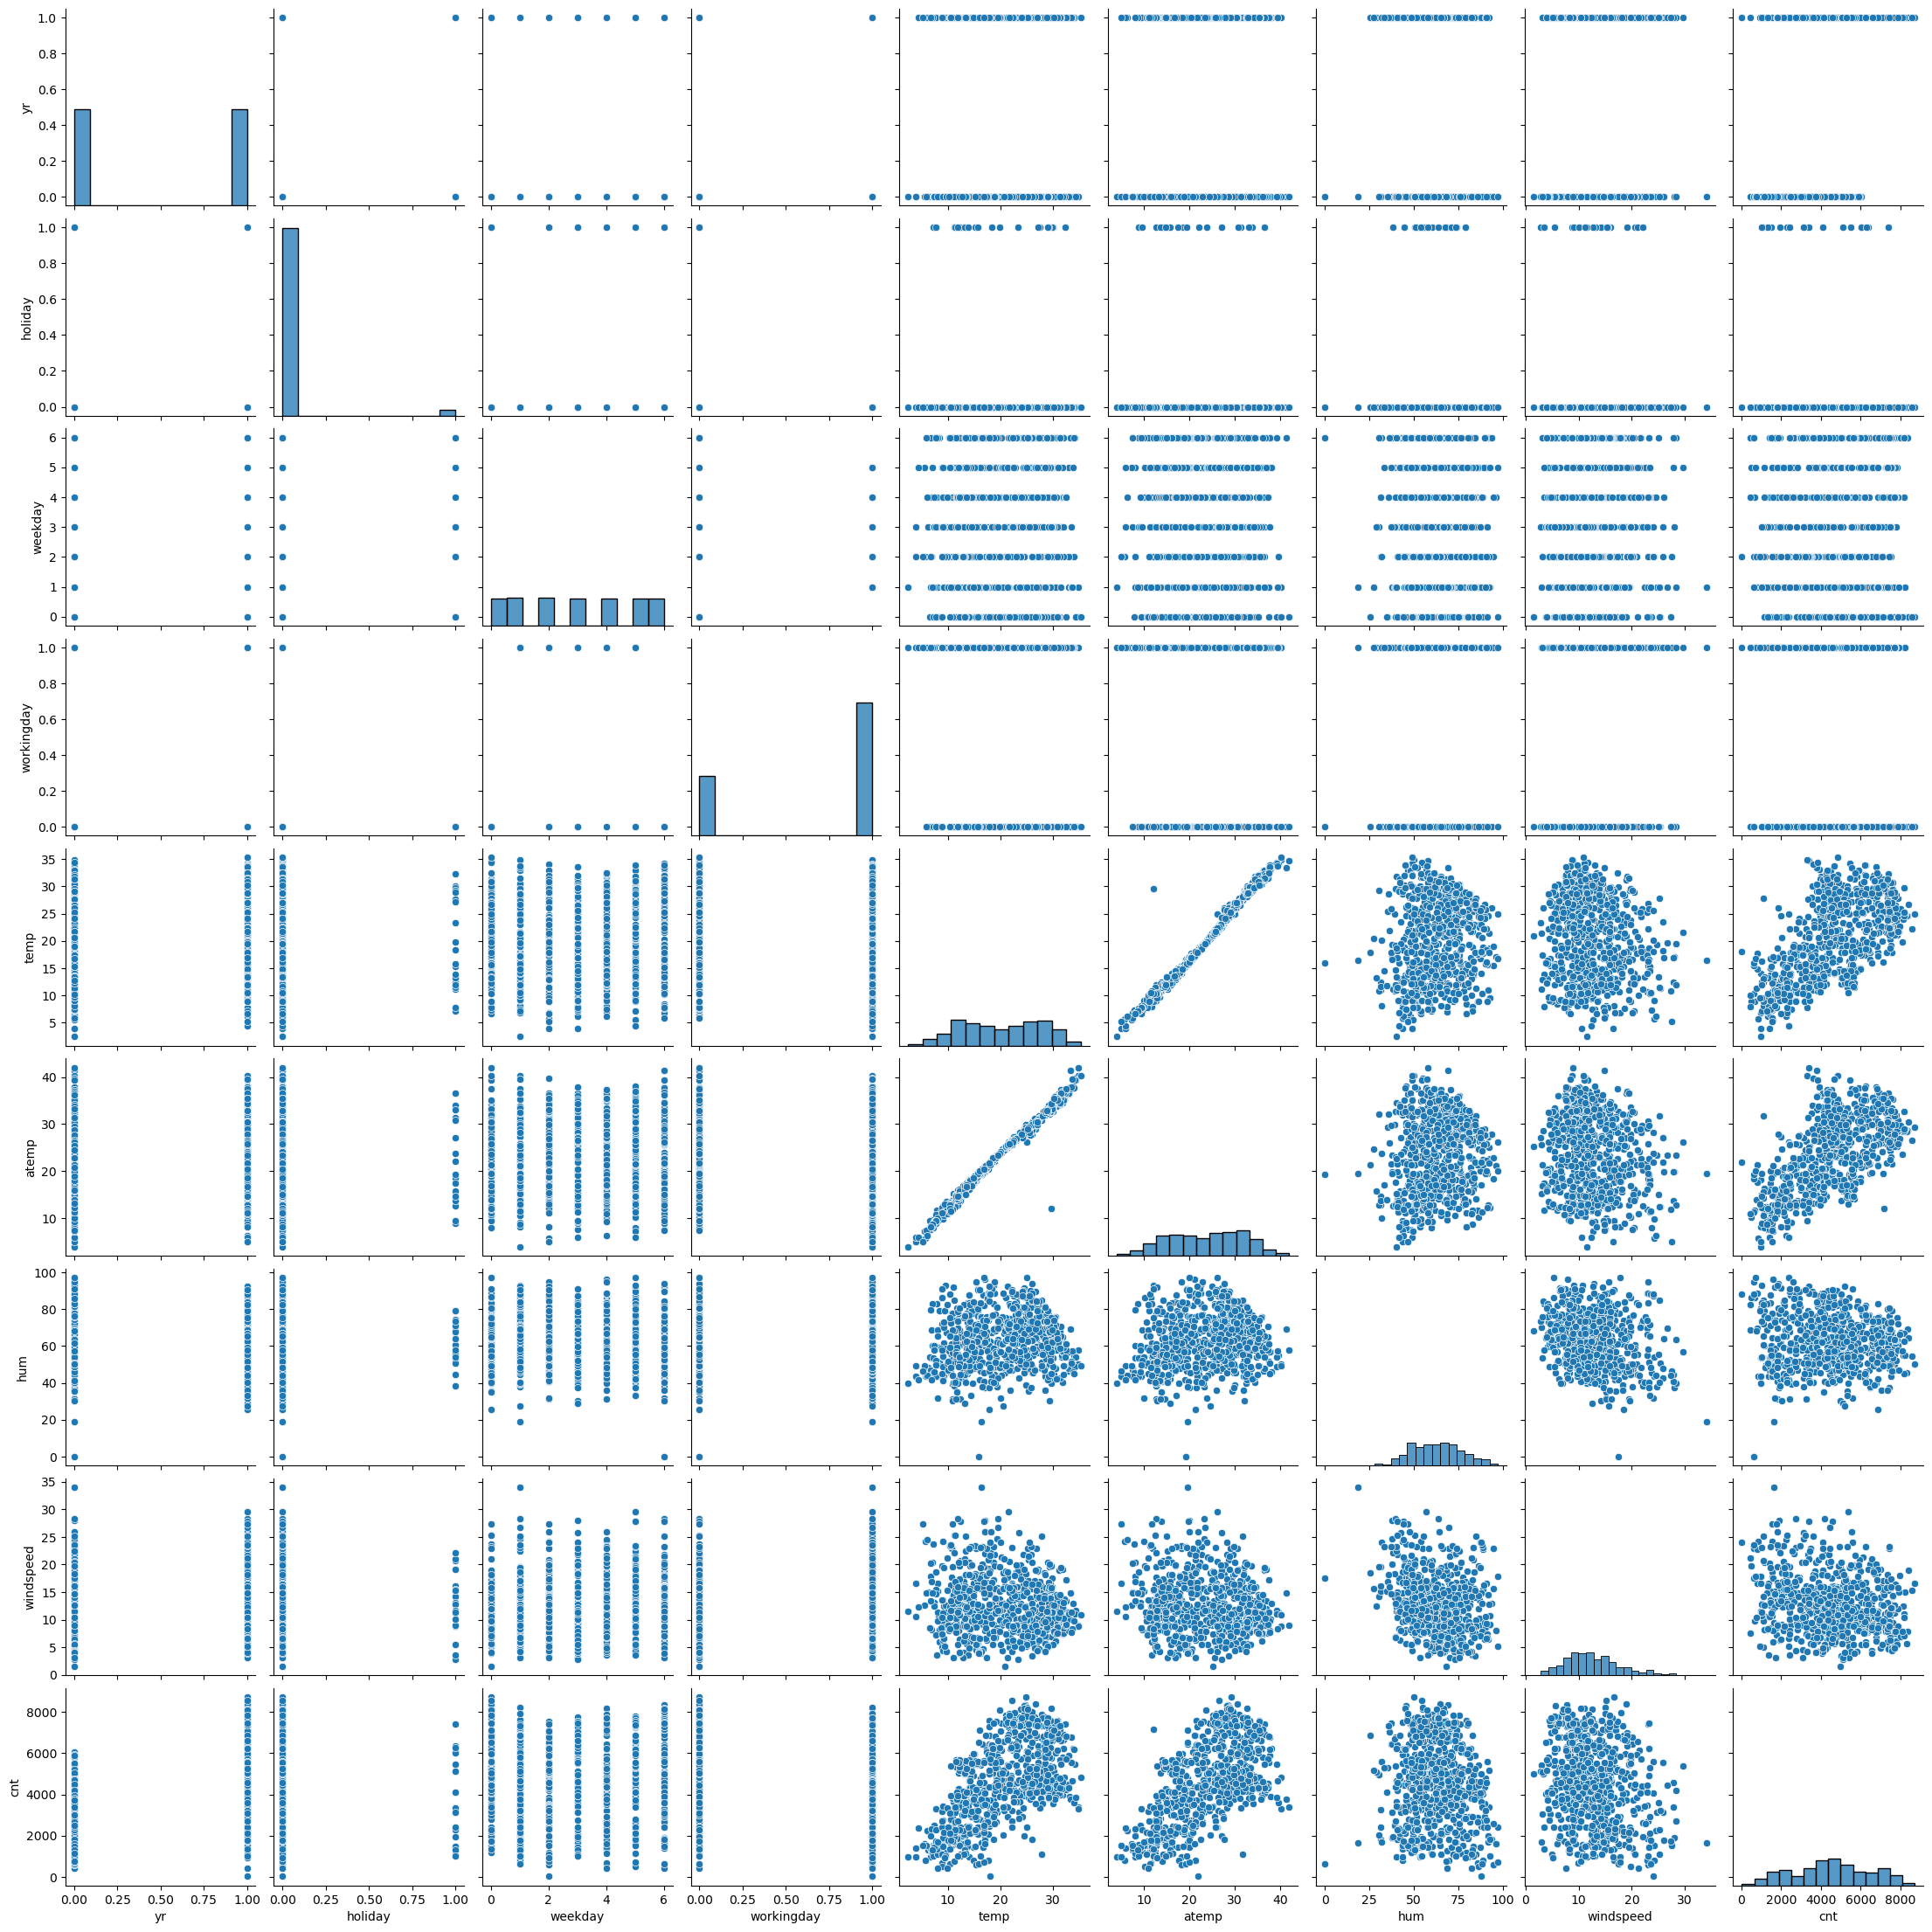

In [999]:
# Visualization of numerical variables
sns.pairplot(Bikes_New)
plt.show()

**Univariate Analysis**

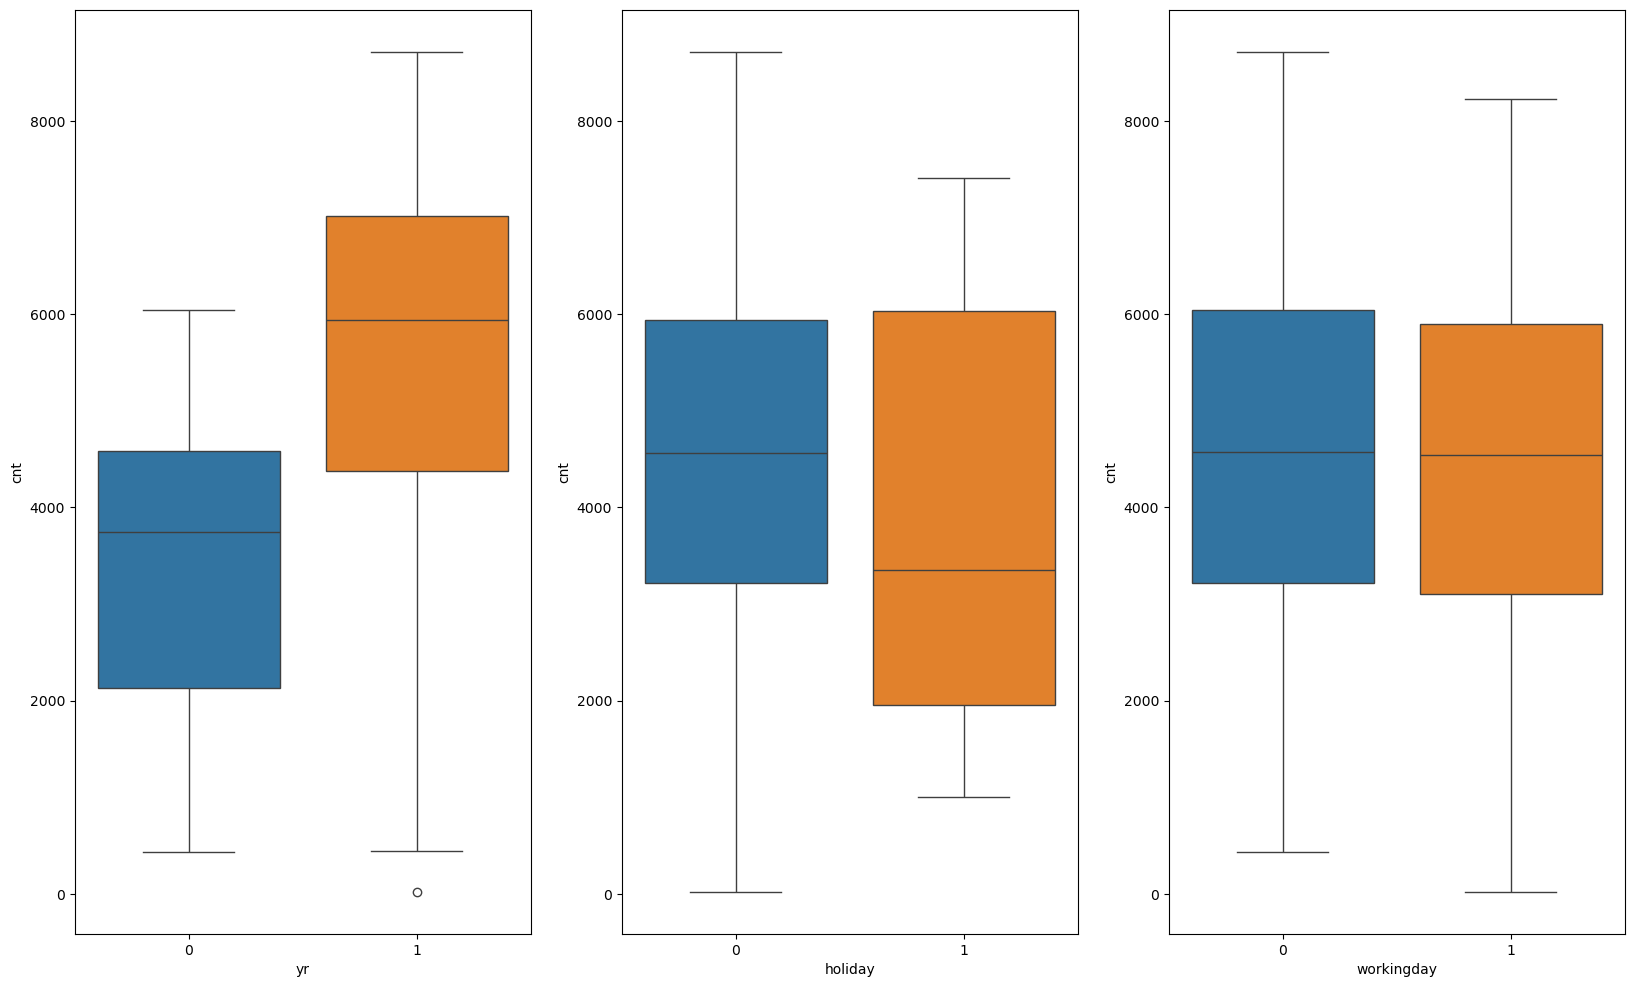

In [1001]:
# Visualizing binary categorcal variables
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(1,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikes_New, palette='tab10')
plt.show()

**Findings:**

- The count of bike usage was higher in the year 2019 compared to 2018.
- The count of bike uaage was higher in the holidays compared to non-holidays.
- There is no much significant difference in the workingday.

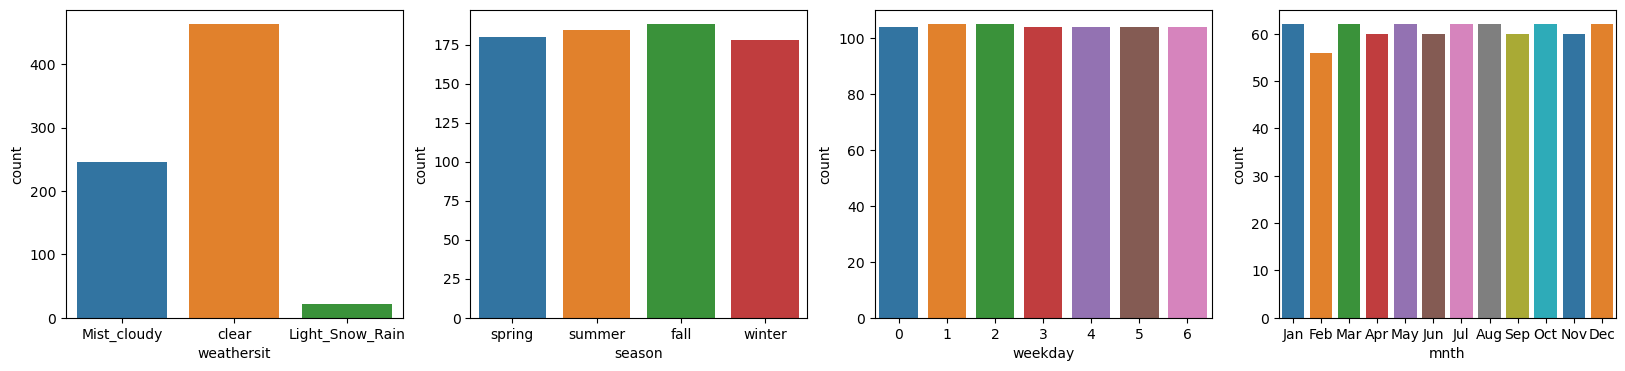

In [1003]:
# visualizing multi categorical variables
plt.figure(figsize=(20, 4))
plt.subplot(1,4,1)
sns.countplot(x = 'weathersit', data = Bikes_New, palette='tab10')
plt.subplot(1,4,2)
sns.countplot(x = 'season', data = Bikes_New, palette='tab10')
plt.subplot(1,4,3)
sns.countplot(x = 'weekday', data = Bikes_New, palette='tab10')
plt.subplot(1,4,4)
sns.countplot(x = 'mnth', data = Bikes_New, palette='tab10')
plt.show()

**Findings:**

-In the case of weatersit variable, the bike usage was higher in the clear days compared to mist and light_snow_rain categories

-There is no significant difference in other variables like season, weekday and month

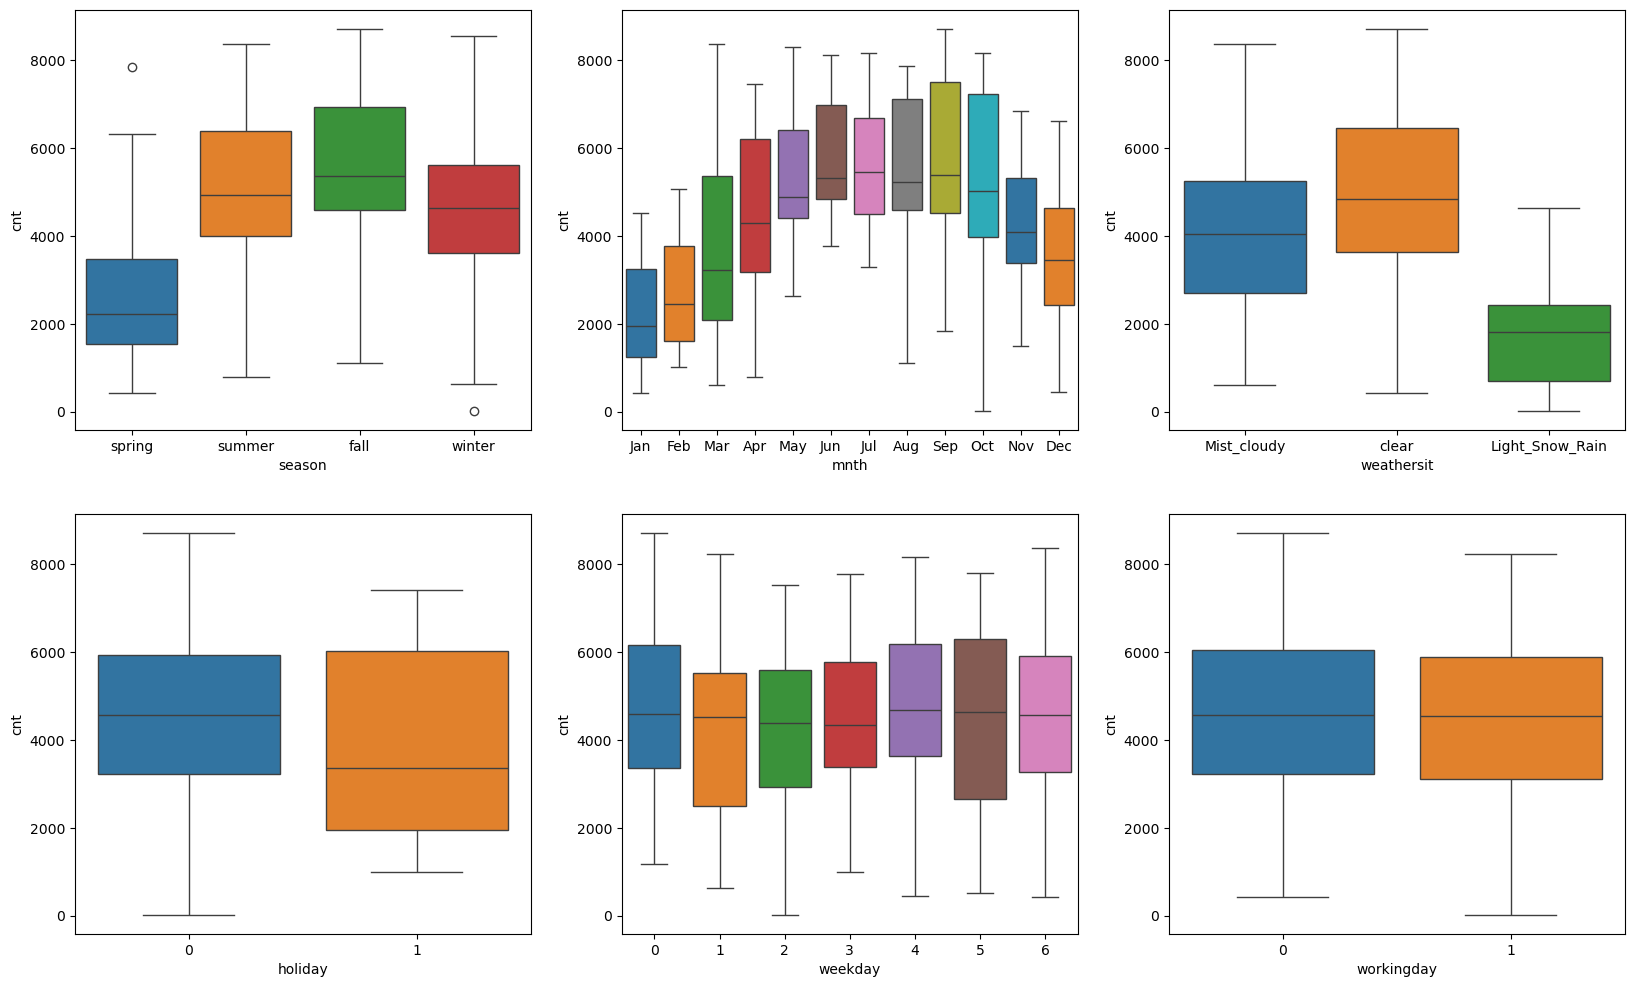

In [1005]:
# Visualize all categorical variables against the target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikes_New, palette='tab10')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikes_New, palette='tab10')
plt.show()

**Findings:**

-The count of usage of bikes is more in the fall season follwed by summer.

-The bike bookings were higher in the month of september follwed by october.

-In the case of weatersit variable, the bike usage was higher in the clear days compared to mist and light_snow_rain categories.

-The count of bike uaage was higher in the holidays compared to non-holidays.

-There is no much significant difference in the weekday.

-There is no much significant difference in the workingday.

**Create Dummy Variable**

In [1008]:
Bikes_New = pd.get_dummies(Bikes_New, drop_first=True)
Bikes_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_spring           730 non-null    bool   
 9   season_summer           730 non-null    bool   
 10  season_winter           730 non-null    bool   
 11  mnth_Aug                730 non-null    bool   
 12  mnth_Dec                730 non-null    bool   
 13  mnth_Feb                730 non-null    bool   
 14  mnth_Jan                730 non-null    bo

In [1009]:
Bikes_New.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,True,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,True,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,False,False,True


In [1010]:
Bikes_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_spring           730 non-null    bool   
 9   season_summer           730 non-null    bool   
 10  season_winter           730 non-null    bool   
 11  mnth_Aug                730 non-null    bool   
 12  mnth_Dec                730 non-null    bool   
 13  mnth_Feb                730 non-null    bool   
 14  mnth_Jan                730 non-null    bo

In [1011]:
# List of variables to map

varlist =  ['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Mist_cloudy', 'weathersit_clear']


Bikes_New[varlist] = Bikes_New[varlist].astype(int)

In [1012]:
Bikes_New.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,1


In [1013]:
df_train, df_test = train_test_split(Bikes_New, train_size=0.70, test_size=0.30, random_state=100)

In [1015]:
df_train.shape

(510, 30)

In [1018]:
df_test.shape

(219, 30)

In [1027]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      510 non-null    int64  
 1   holiday                 510 non-null    int64  
 2   workingday              510 non-null    int64  
 3   temp                    510 non-null    float64
 4   atemp                   510 non-null    float64
 5   hum                     510 non-null    float64
 6   windspeed               510 non-null    float64
 7   cnt                     510 non-null    int64  
 8   season_spring           510 non-null    int32  
 9   season_summer           510 non-null    int32  
 10  season_winter           510 non-null    int32  
 11  mnth_Aug                510 non-null    int32  
 12  mnth_Dec                510 non-null    int32  
 13  mnth_Feb                510 non-null    int32  
 14  mnth_Jan                510 non-null    int32 

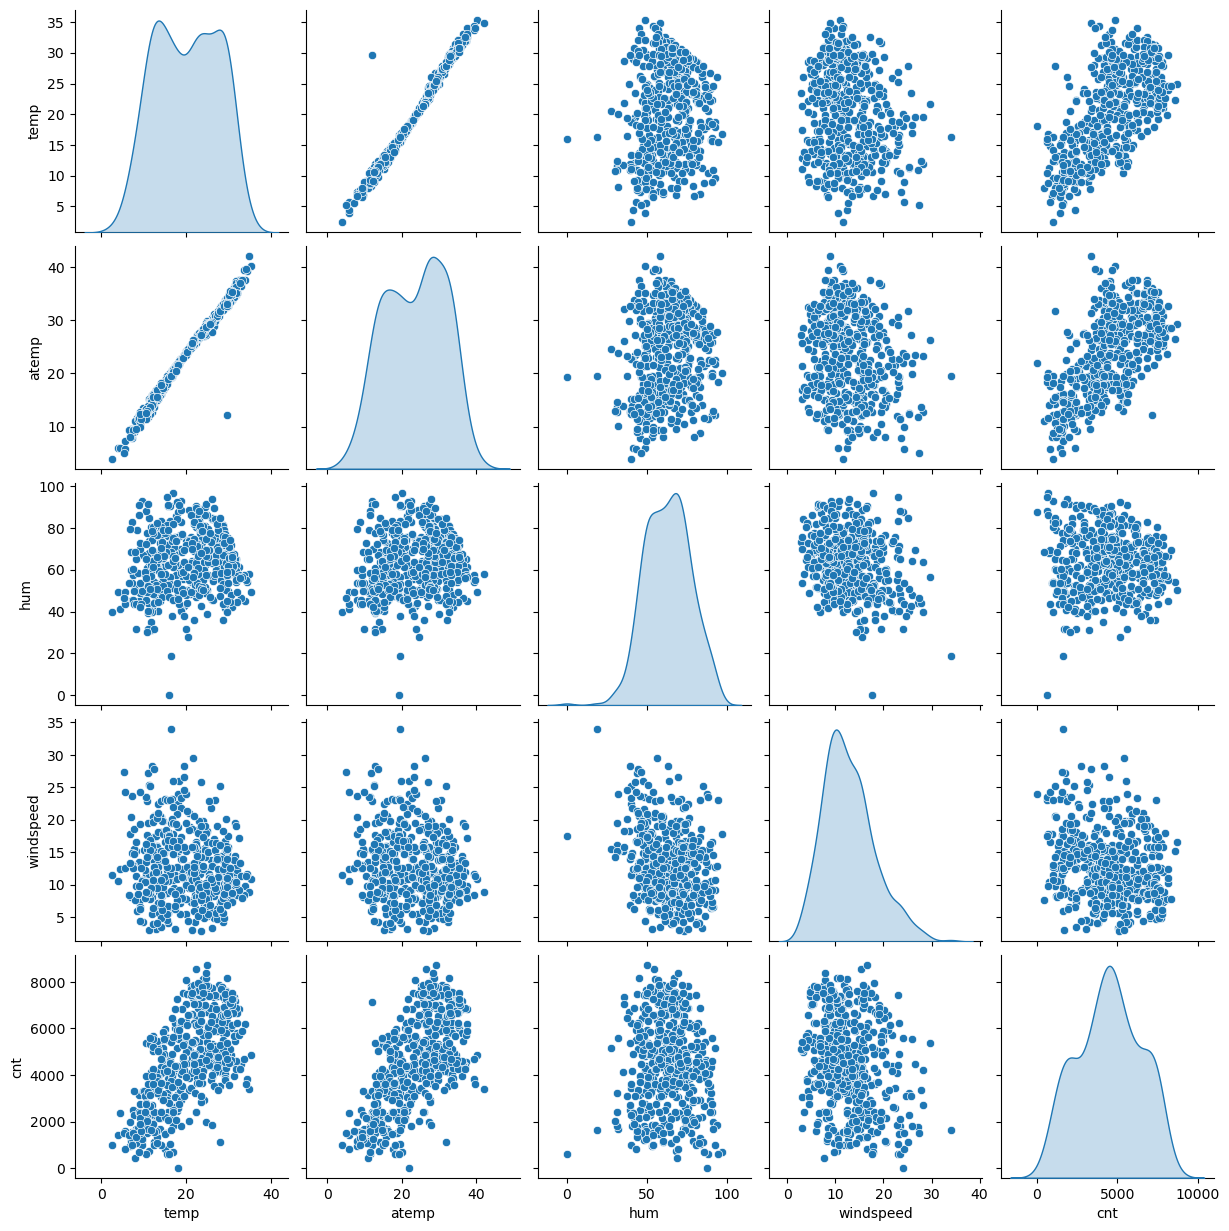

In [1030]:
# Create a dataframe for numeric variables
Bikes_num = df_train[['temp','atemp','hum','windspeed','cnt']]

sns.pairplot(Bikes_num, diag_kind='kde')
plt.show()

From the above pairplot we can infer that there is a linear relationship between temp, atemp, cnt

<Axes: >

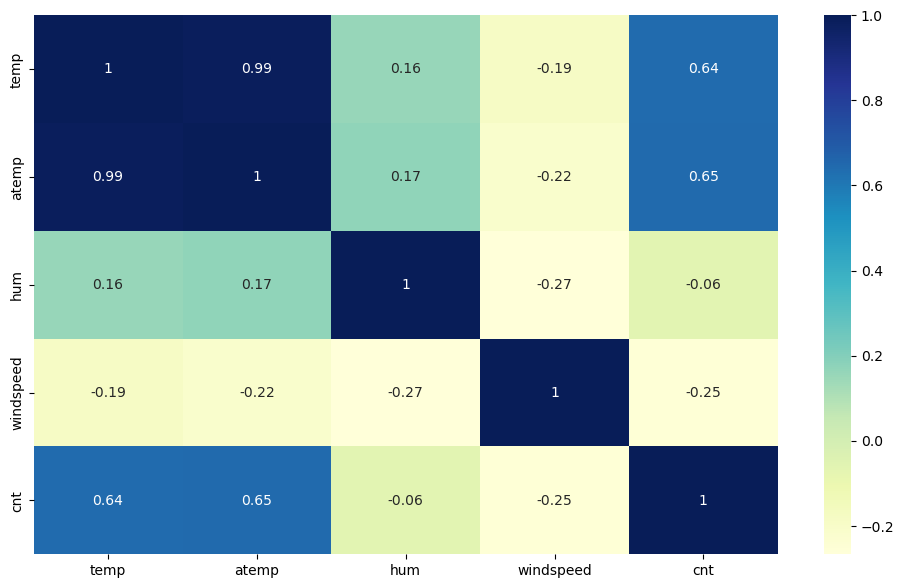

In [1032]:
plt.figure(figsize=(12,7))
sns.heatmap(Bikes_num.corr(), annot=True, cmap='YlGnBu')

**Rescaling the features by using MinMaxScalar method**

In [1035]:
scaler = MinMaxScaler()

In [1038]:
# Check the vcalues before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,1,0


In [1040]:
# Create a dataframe for numeric variables
num_var = ['temp','atemp','hum','windspeed','cnt']
df_train[num_var]= scaler.fit_transform(df_train[num_var])

In [1042]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,1,0


In [1044]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.627451
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1046]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [1048]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,1,0,...,0,0,0,1,0,0,0,0,1,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,0,0,0,1,0,0,1
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,1,0,0,1
350,0,0,1,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,1,0,0,0,0,0,1,0


**Recursive Feature Elimination**

In [1051]:
# Run the RFE with output number of variables equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [1059]:
rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1061]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 7),
 ('weekday_4', False, 5),
 ('weekday_5', False, 6),
 ('weekday_6', False, 12),
 ('weathersit_Mist_cloudy', True, 1),
 ('weathersit_clear', True, 1)]

In [1063]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Mist_cloudy', 'weathersit_clear'],
      dtype='object')

In [1065]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [1067]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1069]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Mist_cloudy', 'weathersit_clear'],
      dtype='object')

**Build Linear model using the stats model**

<font color=red>**Model 1**</font>

**VIF Check**

In [1074]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1076]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.36
2,temp,25.12
14,weathersit_clear,15.69
13,weathersit_Mist_cloudy,9.25
5,season_spring,5.75
4,windspeed,4.67
7,season_winter,4.54
6,season_summer,3.28
0,yr,2.10
11,mnth_Nov,1.89


In [1078]:
import statsmodels.api as sm

In [1080]:
# Add constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Run first model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.params

const                     0.072127
yr                        0.230328
holiday                  -0.091228
temp                      0.479977
hum                      -0.160227
windspeed                -0.188457
season_spring            -0.061737
season_summer             0.040767
season_winter             0.103435
mnth_Dec                 -0.037199
mnth_Jan                 -0.043748
mnth_Jul                 -0.055495
mnth_Nov                 -0.040949
mnth_Sep                  0.074891
weathersit_Mist_cloudy    0.192240
weathersit_clear          0.248116
dtype: float64

In [1082]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        08:56:03   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

<font color=red>**Model 2**</font>

- As we can not remove any variables based on the p value, remove the variable which is having highest VIF Value i.e., 'hum'

In [1085]:
X_train_new = X_train_rfe.drop(['hum'], axis=1)

**VIF check**

In [1088]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_clear,15.68
2,temp,14.00
12,weathersit_Mist_cloudy,8.77
3,windspeed,4.65
4,season_spring,4.40
6,season_winter,3.36
5,season_summer,2.76
0,yr,2.08
10,mnth_Nov,1.87
8,mnth_Jan,1.74


In [1092]:
# Add constant
X_train_lm2 = sm.add_constant(X_train_new)

# Run first model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const                    -0.046257
yr                        0.234287
holiday                  -0.091915
temp                      0.437655
windspeed                -0.158596
season_spring            -0.071640
season_summer             0.033271
season_winter             0.088652
mnth_Dec                 -0.044529
mnth_Jan                 -0.050270
mnth_Jul                 -0.050376
mnth_Nov                 -0.041852
mnth_Sep                  0.068219
weathersit_Mist_cloudy    0.211450
weathersit_clear          0.292892
dtype: float64

In [1096]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.57e-186
Time:                        10:57:22   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

<font color=red>**Model 3**</font>

Remove the variable weathersit_clear based on its high VIF value

In [1100]:
X_train_new = X_train_new.drop(['weathersit_clear'], axis=1)

**VIF Check**

In [1103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.60
4,season_spring,2.89
6,season_winter,2.88
5,season_summer,2.23
0,yr,2.07
10,mnth_Nov,1.79
8,mnth_Jan,1.66
9,mnth_Jul,1.59
12,weathersit_Mist_cloudy,1.54


In [1107]:
# Add constant
X_train_lm3 = sm.add_constant(X_train_new)

# Run first model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const                     0.219771
yr                        0.239797
holiday                  -0.080551
temp                      0.466369
windspeed                -0.186215
season_spring            -0.060878
season_summer             0.040230
season_winter             0.074835
mnth_Dec                 -0.027591
mnth_Jan                 -0.040643
mnth_Jul                 -0.053383
mnth_Nov                 -0.024833
mnth_Sep                  0.061706
weathersit_Mist_cloudy   -0.067686
dtype: float64

In [1109]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.08e-160
Time:                        11:03:11   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

<font color = red>**Model 4**</font>

Remove the variable mnth_Nov based on its high p value

In [1113]:
X_train_new = X_train_new.drop(['mnth_Nov'], axis=1)

**VIF check**

In [1116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.56
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
6,season_winter,2.02
8,mnth_Jan,1.65
9,mnth_Jul,1.59
11,weathersit_Mist_cloudy,1.54
10,mnth_Sep,1.34


In [1118]:
# Add constant
X_train_lm4 = sm.add_constant(X_train_new)

# Run first model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.63e-161
Time:                        11:11:28   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2094      0.035      5.952      0.000       0.140       0.279
yr                         0.2397      0.009     25.954      0.000       0.222       0.258
holiday                   -0.0847      0.029     -2.898      0.004      -0.142      -0.027
temp                       0.4784      0.040     12.078      0.000       0.401       0.556
windspeed                 -0.1865      0.028     -6.555      0.000      -0.242      -0.131
season_spring             -0.0558      0.024     -2.335      0.020      -0.103      -0.009
season_summer              0.0436      0.017      2.523      0.012       0.010       0.078
season_winter              0.0691      0.020      3.519      0.000       0.031       0.108
mnth_Dec                  -0.0186      0.018     -1.013      0.312      -0.055       0.017
mnth_Jan                  -0.0376      0.021     -1.825      0.069      -0.078       0.003
mnth_Jul                  -0.0533      0.021     -2.543      0.011      -0.094      -0.012
mnth_Sep                   0.0652      0.019      3.409      0.001       0.028       0.103
weathersit_Mist_cloudy    -0.0674      0.010     -6.893      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      139.682   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.521
Skew:                          -1.215   Prob(JB):                    1.88e-112
Kurtosis:                       7.279   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = red>**Model 5**</font>

Remove the variable mnth_Dec based on its high p value

In [1122]:
X_train_new = X_train_new.drop(['mnth_Dec'], axis=1)

**VIF check**

In [1127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.55
4,season_spring,2.75
5,season_summer,2.22
0,yr,2.07
6,season_winter,1.76
7,mnth_Jan,1.61
8,mnth_Jul,1.59
10,weathersit_Mist_cloudy,1.53
9,mnth_Sep,1.33


In [1129]:
# Add constant
X_train_lm5 = sm.add_constant(X_train_new)

# Run first model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          2.01e-162
Time:                        11:15:43   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2010      0.034      5.879      0.000       0.134       0.268
yr                         0.2397      0.009     25.953      0.000       0.222       0.258
holiday                   -0.0839      0.029     -2.869      0.004      -0.141      -0.026
temp                       0.4876      0.039     12.644      0.000       0.412       0.563
windspeed                 -0.1835      0.028     -6.484      0.000      -0.239      -0.128
season_spring             -0.0549      0.024     -2.297      0.022      -0.102      -0.008
season_summer              0.0456      0.017      2.654      0.008       0.012       0.079
season_winter              0.0680      0.020      3.469      0.001       0.029       0.107
mnth_Jan                  -0.0331      0.020     -1.645      0.101      -0.073       0.006
mnth_Jul                  -0.0536      0.021     -2.557      0.011      -0.095      -0.012
mnth_Sep                   0.0667      0.019      3.498      0.001       0.029       0.104
weathersit_Mist_cloudy    -0.0674      0.010     -6.899      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      137.324   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.840
Skew:                          -1.199   Prob(JB):                    7.86e-109
Kurtosis:                       7.205   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=red>**Model 6**</font>

Remove the variable mnth_Jan based on its high p value

In [1133]:
X_train_new = X_train_new.drop(['mnth_Jan'], axis=1)

**VIF check**

In [1136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,season_summer,2.21
4,season_spring,2.08
0,yr,2.06
6,season_winter,1.76
7,mnth_Jul,1.58
9,weathersit_Mist_cloudy,1.52
8,mnth_Sep,1.33
1,holiday,1.04


In [1138]:
# Add constant
X_train_lm6 = sm.add_constant(X_train_new)

# Run first model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          5.44e-163
Time:                        11:19:24   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1872      0.033      5.638      0.000       0.122       0.252
yr                         0.2390      0.009     25.862      0.000       0.221       0.257
holiday                   -0.0845      0.029     -2.887      0.004      -0.142      -0.027
temp                       0.5039      0.037     13.497      0.000       0.431       0.577
windspeed                 -0.1773      0.028     -6.311      0.000      -0.232      -0.122
season_spring             -0.0597      0.024     -2.511      0.012      -0.106      -0.013
season_summer              0.0483      0.017      2.817      0.005       0.015       0.082
season_winter              0.0733      0.019      3.785      0.000       0.035       0.111
mnth_Jul                  -0.0550      0.021     -2.625      0.009      -0.096      -0.014
mnth_Sep                   0.0671      0.019      3.515      0.000       0.030       0.105
weathersit_Mist_cloudy    -0.0682      0.010     -6.980      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      137.062   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.223
Skew:                          -1.196   Prob(JB):                    1.07e-108
Kurtosis:                       7.204   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1154]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Mist_cloudy'],
      dtype='object')

<font color = red>**Model 7**</font>

Although temp variable have high VIF than the windspeed, based on the domain knowledge data visualization knowledge keep the temp variable for the model analysis and remove windspeed variable

In [1147]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)

**VIF check**

In [1150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.21
0,yr,2.06
4,season_summer,1.92
6,mnth_Jul,1.58
5,season_winter,1.53
8,weathersit_Mist_cloudy,1.52
3,season_spring,1.39
7,mnth_Sep,1.33
1,holiday,1.04


In [1157]:
# Add constant
X_train_lm7 = sm.add_constant(X_train_new)

# Run first model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          7.34e-156
Time:                        11:55:20   Log-Likelihood:                 419.20
No. Observations:                 510   AIC:                            -818.4
Df Residuals:                     500   BIC:                            -776.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1266      0.033      3.838      0.000       0.062       0.191
yr                         0.2382      0.010     24.829      0.000       0.219       0.257
holiday                   -0.0871      0.030     -2.865      0.004      -0.147      -0.027
temp                       0.5191      0.039     13.422      0.000       0.443       0.595
season_spring             -0.0706      0.025     -2.870      0.004      -0.119      -0.022
season_summer              0.0366      0.018      2.068      0.039       0.002       0.071
season_winter              0.0741      0.020      3.683      0.000       0.035       0.114
mnth_Jul                  -0.0555      0.022     -2.552      0.011      -0.098      -0.013
mnth_Sep                   0.0718      0.020      3.623      0.000       0.033       0.111
weathersit_Mist_cloudy    -0.0653      0.010     -6.443      0.000      -0.085      -0.045
==============================================================================
Omnibus:                      159.384   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.042
Skew:                          -1.331   Prob(JB):                    1.32e-153
Kurtosis:                       8.104   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1240]:
lr7.params

const                     0.126639
yr                        0.238197
holiday                  -0.087078
temp                      0.519088
season_spring            -0.070617
season_summer             0.036574
season_winter             0.074055
mnth_Jul                 -0.055538
mnth_Sep                  0.071766
weathersit_Mist_cloudy   -0.065313
dtype: float64

The model 7 looks good, as there seems to low multicollinearilty between the independent variables and the p values for all the predictors seems to be significant. Based on the above criteria we will consider this as our final model.
                                                                                                                   

**Final Model Interpretation**

Hypothesis testing:

H0 = B1=B2=...=Bn=0
H1 = Atleast one Bi!=0

lr7 model coefficient values:

-const = 0.126639

-yr = 0.238197

-holiday = -0.087078

-temp = 0.519088

-season_spring = -0.070617

-season_summer = 0.036574

-season_winter = 0.074055

-mnth_Jul = -0.055538

-mnth_Sep = 0.071766

-weathersit_Mist_cloudy = -0.065313

* From lr model 7 its is evident that none of our coefficients values are equal to zero hence we will reject the null hypothesis.

* F-statistic value 191.7(which is greater than 1), Prob(F-statistic) 7.34e-156 which is very close to zero and p values for all the predictors is less than 0.05 states that overall model is significant.

<font color=red>**The euation of best fitted surface based on lr7 model:**</font>

<font color=black>**cnt = 0.126639+(yr * 0.238197)-(holiday * 0.087078)+(temp * 0.519088)-(season_spring * 0.070617)+(season_summer * 0.036574)+(season_winter * 0.074055)-(mnth_Jul * 0.055538)+(mnth_Sep * 0.071766)-(weathersit_Mist_cloudy * 0.065313).**</font>

**Interpretation of coefficients**

* Positive coefficient values of (b1, b2, b3,...bn) indicates that a unit increase in the independent variable(X1, X2,X3,...Xn) leads increase in the bike hire by (b1, b2, b3,...bn) units.
* Negative coefficient values of (b1, b2, b3,...bn) indicates that a unit increase in the independent variable(X1, X2,X3,...Xn) leads decrease in the bike hire by (b1, b2, b3,...bn) units.
* A constant value of 0.126639 indicates that in the absence of predictor variables the bike hire is equal to that constant number.

**Assumptions of the Error terms**

In [1160]:
y_train_pred = lr7.predict(X_train_lm7)

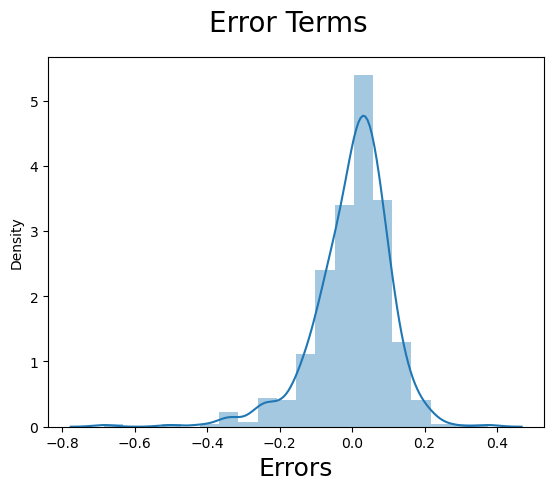

In [1170]:
res = y_train-y_train_pred

#plot the histogram of error terms
fig = plt.figure()
sns.distplot((res), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

From the above histogram we can infer that, the residuals are normally distributed. Hence our pre reqisite assumption for the linear regression is valid

In [1176]:
X_train_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   510 non-null    float64
 1   yr                      510 non-null    int64  
 2   holiday                 510 non-null    int64  
 3   temp                    510 non-null    float64
 4   season_spring           510 non-null    int32  
 5   season_summer           510 non-null    int32  
 6   season_winter           510 non-null    int32  
 7   mnth_Jul                510 non-null    int32  
 8   mnth_Sep                510 non-null    int32  
 9   weathersit_Mist_cloudy  510 non-null    int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 31.9 KB


<font color = red>**Making the predictions using the final model**</font>

**Apply scaling on the test data set**

In [1181]:
# Create a dataframe for numeric variables
num_var = ['temp','atemp','hum','windspeed','cnt']
df_test[num_var]= scaler.transform(df_test[num_var])

In [1183]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,1
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,1,0,0,1
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,1


In [1185]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Mist_cloudy,weathersit_clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.652968
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1187]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    int64  
 1   holiday                 219 non-null    int64  
 2   workingday              219 non-null    int64  
 3   temp                    219 non-null    float64
 4   atemp                   219 non-null    float64
 5   hum                     219 non-null    float64
 6   windspeed               219 non-null    float64
 7   season_spring           219 non-null    int32  
 8   season_summer           219 non-null    int32  
 9   season_winter           219 non-null    int32  
 10  mnth_Aug                219 non-null    int32  
 11  mnth_Dec                219 non-null    int32  
 12  mnth_Feb                219 non-null    int32  
 13  mnth_Jan                219 non-null    int32  
 14  mnth_Jul                219 non-null    int32 

In [1189]:
# Select the variables that were part of the final model
coll = X_train_new.columns
X_test = X_test[coll]

# Add constant to the test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   219 non-null    float64
 1   yr                      219 non-null    int64  
 2   holiday                 219 non-null    int64  
 3   temp                    219 non-null    float64
 4   season_spring           219 non-null    int32  
 5   season_summer           219 non-null    int32  
 6   season_winter           219 non-null    int32  
 7   mnth_Jul                219 non-null    int32  
 8   mnth_Sep                219 non-null    int32  
 9   weathersit_Mist_cloudy  219 non-null    int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 13.7 KB


In [1194]:
y_pred = lr7.predict(X_test_lm7)

**Model Evaluation**

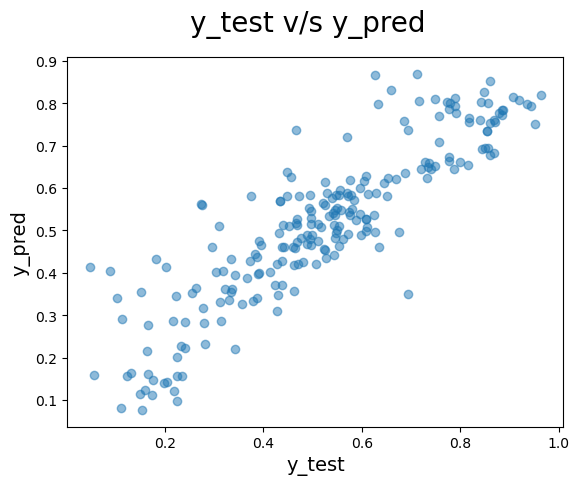

In [1198]:
# Plot y_test and y_predt to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
fig.suptitle('y_test v/s y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=14)
plt.show()

**R^2 value for test dataset**

In [1203]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7759565106718698

**Adjusted R^2 value for test dataset**

In [1206]:
r2 = 0.7759565106718698

In [1210]:
# Get the shape of x_test dataset
X_test.shape

(219, 9)

In [1212]:
# n is the number of rows in the x_test
n= X_test.shape[0]

# p is the number of features in the x_test
p=X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7663087049113283

<font color=red>**Final Results Comparision**</font>

-Train R^2 = 0.775

-Train Adjusted R^2 = 0.771

-Test R^2 = 0.775

-Test Adjusted R^2 = 0.766

In [1224]:
r2_train=0.775
r2_test=0.775

In [1226]:
# Check the difference between the test_train r2 score
print('Difference in r2 score(%)', (-r2_train+r2_test)*100)

Difference in r2 score(%) 0.0


In [1230]:
Train_adjusted_r2 = 0.771
Test_adjusted_r2 = 0.766

In [1234]:
# Check the difference between the adjusted test_train r2 score
print('Difference in r2 score(%)', (Train_adjusted_r2-Test_adjusted_r2)*100)

Difference in r2 score(%) 0.5000000000000004


<font color=red>**Final Report**</font>

As per our final model, top 2 variables that affect bike booking are:

* Temperature(temp): A coeffcient value of '0.519088' indicated that a unit increase in temperature variable increases the bike booking numbers by 0.519088 units.
* Year(yr):A coeffcient value of '0.238197' indicated that a unit increase in year variable increases the bike booking numbers by 0.238197 units.
* yr, temp, season_summer, season_winter and mnth_Sep variables are positively affecting the bike hire numbers.
* Whereas holiday, season_spring, mnth_Jul and weathersit_Mist_cloudy variables are negatively affecting the bike hire numbers.

So, it is recommended to consider the above variables  atmost importance while planning to achieve maximum bike bookins.